In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns
import time
# to load trained model
from tensorflow.keras.models import load_model

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
mnist


<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [4]:
(X_train_full,y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<function matplotlib.pyplot.show(*args, **kw)>

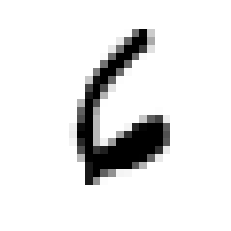

In [8]:
plt.imshow(X_train_full[5003],cmap = 'binary')
plt.axis("off")
plt.show

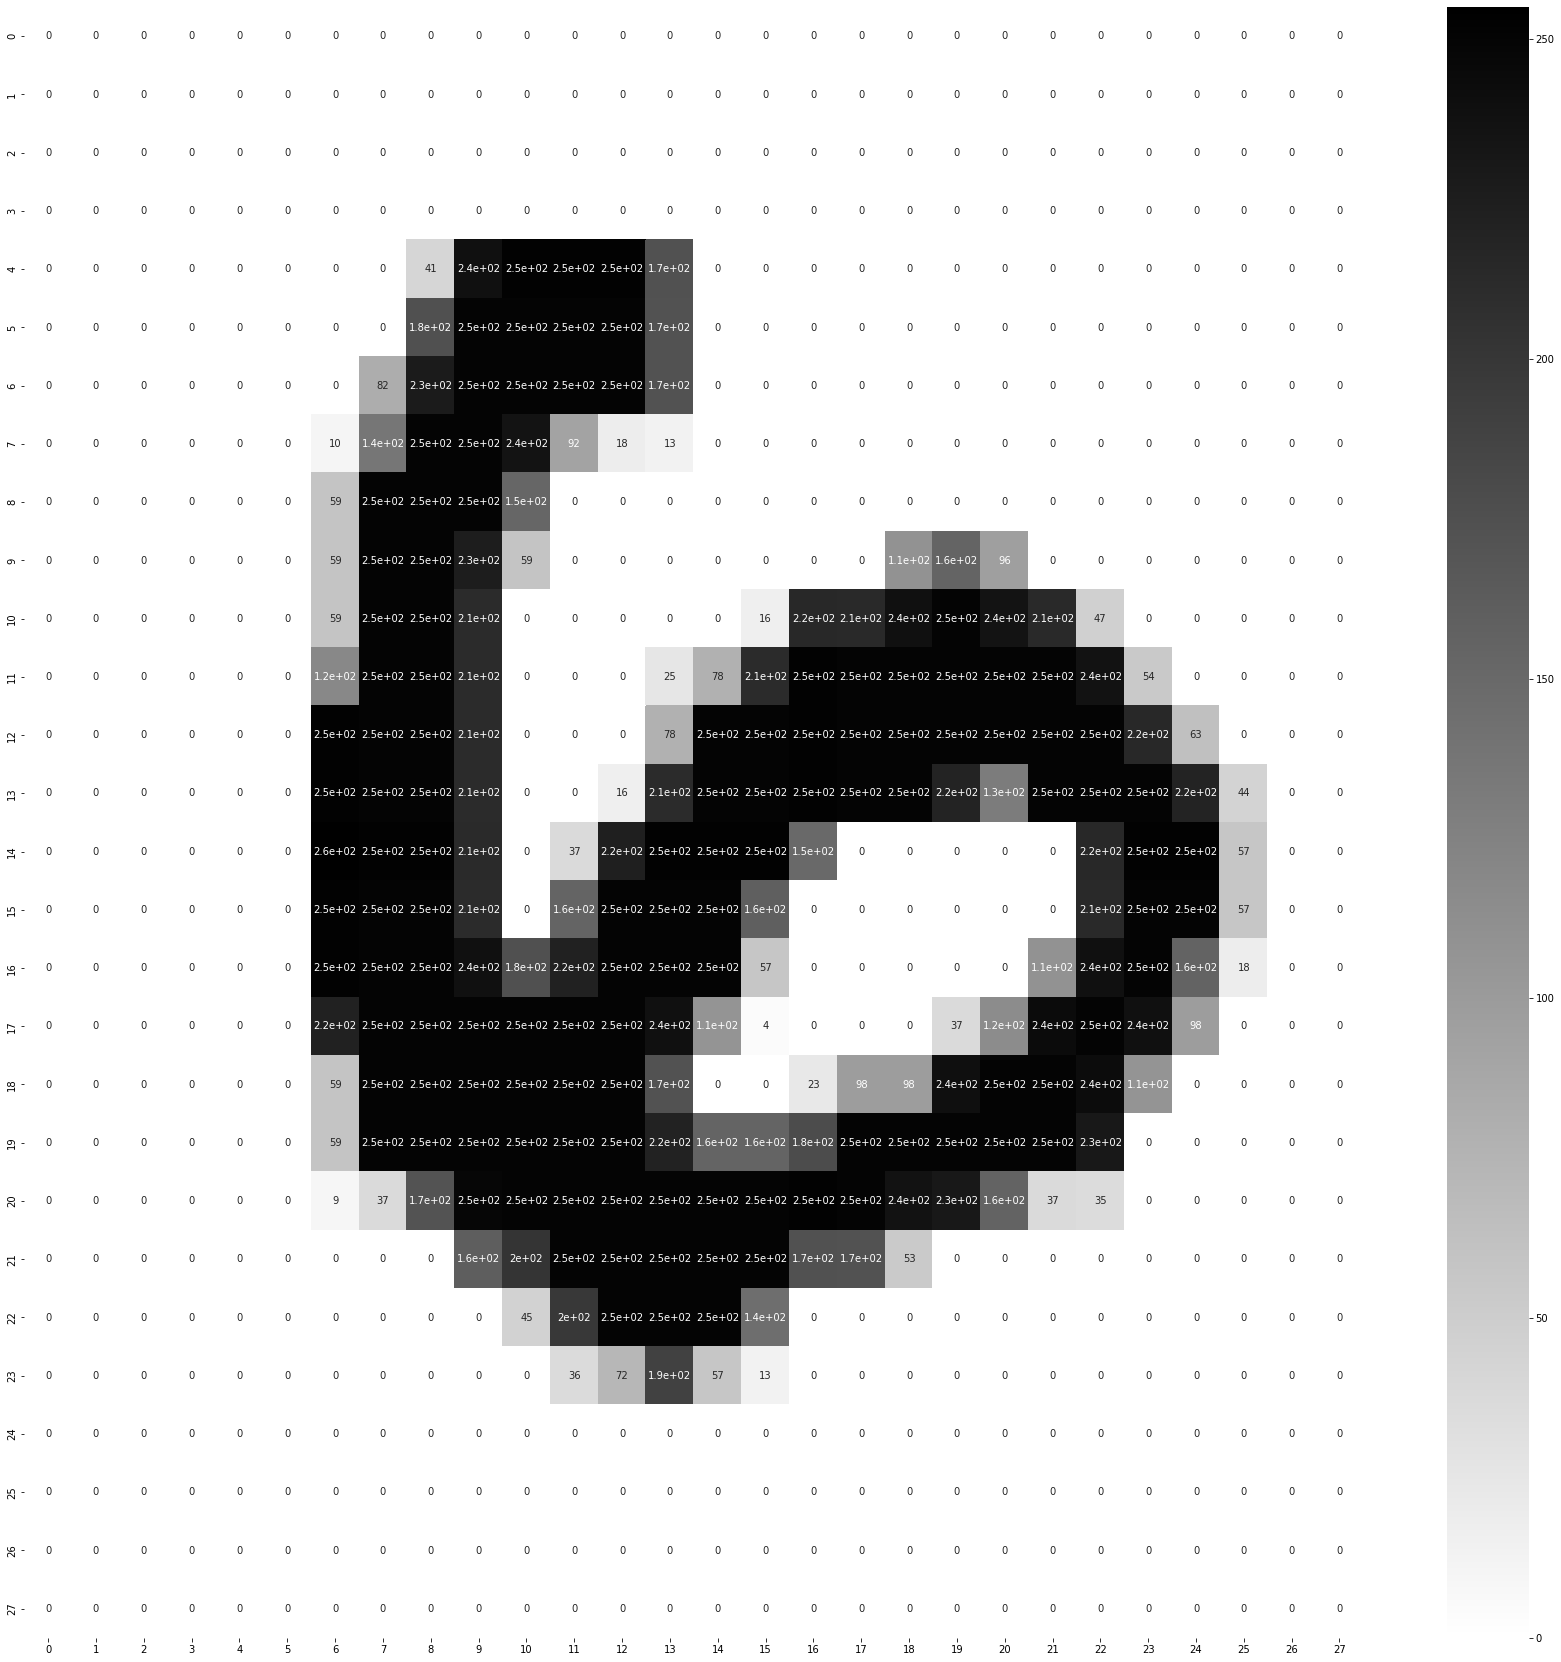

In [9]:
plt.figure(figsize =(30,30))
sns.heatmap(X_train_full[9000], annot = True, cmap= "binary")

In [10]:
X_valid,X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]


In [11]:
# Scale the test as well
X_test = X_test / 255

In [12]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


In [14]:
LAYERS = [tf.keras.layers.Flatten(input_shape = [28,28], name = 'inputlayer'),
          tf.keras.layers.Dense(300, activation = 'relu',name = "hiddenlayer1"),
          tf.keras.layers.Dense(100, activation = 'relu', name = "hiddenlayer2"),
          tf.keras.layers.Dense(10, activation = 'softmax', name = "outputlayer")]

In [16]:
model = tf.keras.models.Sequential(LAYERS)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "ADAM"
METRICS = ["accuracy"]


In [19]:
model.compile(loss = LOSS_FUNCTION, optimizer = OPTIMIZER, metrics = METRICS)

In [20]:
model.layers[1].name

'hiddenlayer1'

In [21]:
hidden1 = model.layers[1].name

In [22]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)
history = model.fit(X_train, y_train, epochs = EPOCHS, validation_data = VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 11s 4ms/step - loss: 0.2141 - accuracy: 0.9363 - val_loss: 0.1132 - val_accuracy: 0.9638
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0887 - accuracy: 0.9723 - val_loss: 0.0857 - val_accuracy: 0.9744
Epoch 3/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0588 - accuracy: 0.9813 - val_loss: 0.0766 - val_accuracy: 0.9768
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0446 - accuracy: 0.9854 - val_loss: 0.0817 - val_accuracy: 0.9766
Epoch 5/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0361 - accuracy: 0.9881 - val_loss: 0.0781 - val_accuracy: 0.9772


In [25]:
def saveModel_path(model_dir = "/content/SAVED_MODELS/"):
  os.makedirs(model_dir, exist_ok = True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName)
  print(f"your model will be saved at tha following location\n{model_path}")
  return model_path


In [26]:
model.save(saveModel_path())

your model will be saved at tha following location
/content/SAVED_MODELS/Model_2023_02_21_05_43_55_.h5


In [27]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [29]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.214083,0.936273,0.113244,0.9638
1,0.088651,0.972345,0.085746,0.9744
2,0.058807,0.981273,0.076596,0.9768
3,0.044578,0.985382,0.081733,0.9766
4,0.036086,0.988073,0.078112,0.9772


In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0854 - accuracy: 0.9749


[0.08535459637641907, 0.9749000072479248]

In [31]:
X_test[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

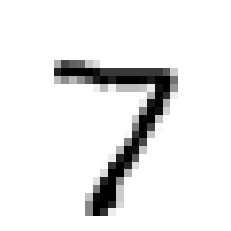

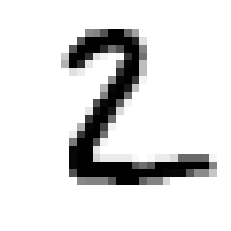

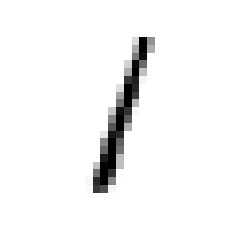

In [37]:
for i in range(0,3):
  plt.imshow(X_test[i],cmap = 'binary')
  plt.axis("off")
  plt.show()

In [39]:

prediction = model.predict(X_test[:3])

1/1 [==============================] - 0s 23ms/step


In [40]:
prediction

array([[6.4206179e-10, 1.8416999e-07, 2.0981685e-07, 9.1737411e-06,
        7.5364819e-12, 1.5401471e-07, 3.8470416e-12, 9.9998617e-01,
        3.2042852e-08, 4.1892158e-06],
       [1.5693015e-14, 2.7706681e-08, 1.0000000e+00, 3.9898188e-10,
        9.4928306e-17, 9.0741437e-15, 2.4841028e-16, 1.1157115e-13,
        8.1436517e-11, 1.2239771e-17],
       [2.8215252e-08, 9.9993587e-01, 9.3877503e-07, 6.3681028e-08,
        9.0507837e-07, 1.6664857e-06, 1.2329319e-06, 1.5938223e-05,
        4.2925323e-05, 5.0445050e-07]], dtype=float32)

In [42]:
y_prob = prediction[0]

In [44]:
y_prob.round(2)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [46]:
for i in range(0,3):
  print(np.argmax(prediction[i]))

7
2
1


In [ ]:
model.predict(X_test)

In [50]:
model_load  = load_model("/content/SAVED_MODELS/Model_2023_02_21_05_43_55_.h5")

In [53]:
prediction1 = model_load.predict(X_test[:3])

1/1 [==============================] - 0s 82ms/step


In [54]:
for i in range(0,3):
  print(np.argmax(prediction1[i]))

7
2
1
